In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://www.kaggle.com/c/mens-march-mania-2022/data
data = pd.read_csv('MNCAATourneyDetailedResults.csv')

In [3]:
# want to see all columns
pd.set_option('display.max_columns', None)
data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,3,7,18,25,11,20,15,18,13,1,19,27,60,7,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,7,20,15,23,18,20,17,13,8,2,14,25,56,9,21,15,20,10,26,16,14,5,8,19


In [4]:
# checking for missing values
data.isna().sum()
# no nan values here!

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64

In [5]:
# data stats
data.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000
mean,2011.650296,139.109229,1293.542760,75.234547,1294.587638,63.707028,0.071126,26.344623,55.462320,7.022862,18.298899,15.522439,21.328535,10.523285,25.861135,14.259949,11.447925,6.392887,3.944962,16.324301,22.911939,57.712108,6.254022,20.502964,11.629128,16.617273,10.970364,21.368332,11.409822,12.171041,5.707875,2.939881,18.853514
std,5.274224,4.234734,102.884842,10.724755,105.945614,10.305693,0.294045,4.751158,7.225518,2.965677,5.679989,6.059217,7.681727,3.978822,5.002307,4.341092,3.812563,2.977842,2.526038,3.860358,4.104239,7.300343,2.761999,5.826098,5.114416,6.609636,4.215384,4.463864,3.641061,3.920983,2.670336,2.045817,4.232007
min,2003.000000,134.000000,1101.000000,47.000000,1101.000000,29.000000,0.000000,13.000000,34.000000,0.000000,4.000000,0.000000,1.000000,0.000000,13.000000,3.000000,2.000000,0.000000,0.000000,5.000000,11.000000,37.000000,0.000000,5.000000,0.000000,2.000000,1.000000,8.000000,2.000000,3.000000,0.000000,0.000000,7.000000
25%,2007.000000,136.000000,1211.000000,68.000000,1210.000000,57.000000,0.000000,23.000000,51.000000,5.000000,14.000000,11.000000,16.000000,8.000000,22.000000,11.000000,9.000000,4.000000,2.000000,14.000000,20.000000,53.000000,4.000000,16.000000,8.000000,12.000000,8.000000,18.000000,9.000000,9.000000,4.000000,1.000000,16.000000
50%,2012.000000,137.000000,1277.000000,75.000000,1295.000000,63.000000,0.000000,26.000000,55.000000,7.000000,18.000000,15.000000,21.000000,10.000000,26.000000,14.000000,11.000000,6.000000,4.000000,16.000000,23.000000,58.000000,6.000000,20.000000,11.000000,16.000000,11.000000,21.000000,11.000000,12.000000,6.000000,3.000000,19.000000
75%,2016.000000,139.000000,1393.000000,82.000000,1393.000000,71.000000,0.000000,29.000000,60.000000,9.000000,22.000000,19.000000,26.000000,13.000000,29.000000,17.000000,14.000000,8.000000,5.000000,19.000000,26.000000,63.000000,8.000000,24.000000,15.000000,21.000000,14.000000,24.000000,14.000000,15.000000,7.000000,4.000000,22.000000
max,2021.000000,154.000000,1463.000000,121.000000,1463.000000,105.000000,2.000000,44.000000,84.000000,18.000000,41.000000,38.000000,48.000000,26.000000,43.000000,29.000000,28.000000,20.000000,15.000000,30.000000,36.000000,85.000000,18.000000,42.000000,31.000000,39.000000,29.000000,42.000000,23.000000,27.000000,19.000000,13.000000,33.000000


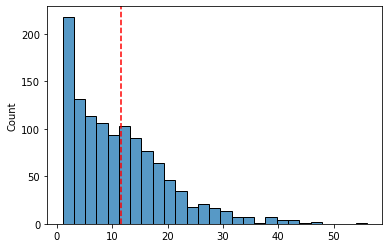

In [6]:
# histogram of point differentials
sns.histplot(data['WScore']-data['LScore'])
plt.axvline(x=(data['WScore']-data['LScore']).mean(),
            color='red', ls='--')

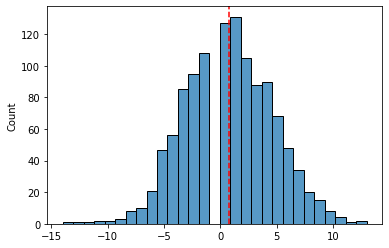

In [7]:
# histogram of 3 point make differentials
sns.histplot(data['WFGM3']-data['LFGM3'])
plt.axvline(x=(data['WFGM3']-data['LFGM3']).mean(),
            color='red', ls='--')

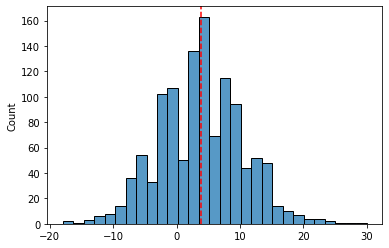

In [8]:
# histogram of free throw make differentials
sns.histplot(data['WFTM']-data['LFTM'])
plt.axvline(x=(data['WFTM']-data['LFTM']).mean(),
            color='red', ls='--')

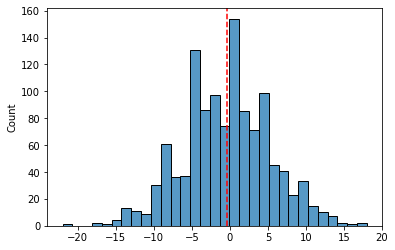

In [9]:
# histogram of offensive rating differentials
sns.histplot(data['WOR']-data['LOR'])
plt.axvline(x=(data['WOR']-data['LOR']).mean(),
            color='red', ls='--')

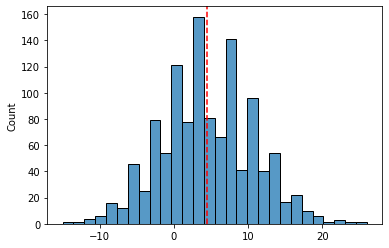

In [10]:
# histogram of defensive rating differentials
sns.histplot(data['WDR']-data['LDR'])
plt.axvline(x=(data['WDR']-data['LDR']).mean(),
            color='red', ls='--')

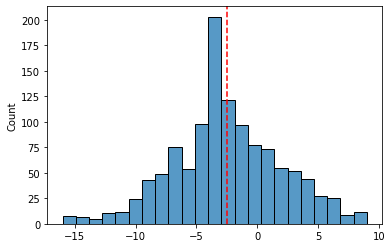

In [11]:
# histogram of personal foul differentials
sns.histplot(data['WPF']-data['LPF'])
plt.axvline(x=(data['WPF']-data['LPF']).mean(),
            color='red', ls='--')

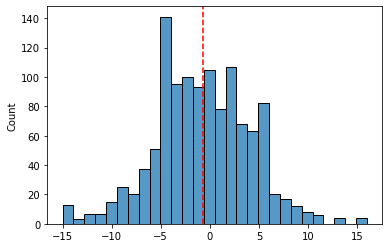

In [12]:
# histogram of turnover differentials
sns.histplot(data['WTO']-data['LTO'])
plt.axvline(x=(data['WTO']-data['LTO']).mean(),
            color='red', ls='--')

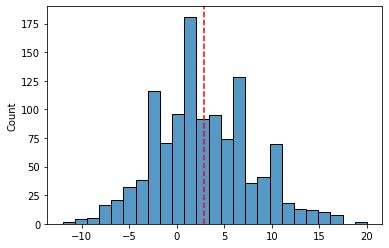

In [13]:
# histogram of assist differentials
sns.histplot(data['WAst']-data['LAst'])
plt.axvline(x=(data['WAst']-data['LAst']).mean(),
            color='red', ls='--')

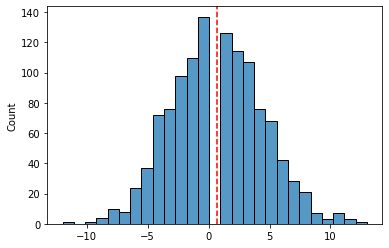

In [14]:
# histogram of steal differentials
sns.histplot(data['WStl']-data['LStl'])
plt.axvline(x=(data['WStl']-data['LStl']).mean(),
            color='red', ls='--')